In [1]:
import bagpy
import rosbag
from bagpy import bagreader
import os
import pandas as pd

In [39]:
# bag_path = os.path.join('../test/testdata', 'chunk_0003.bag')
# bag_path = os.path.join('../test/testdata', 'gmapping_test_0003.bag') # has vel data only
bag_path = os.path.join('../test/testdata', 'rtabmap_test_0003.bag') # has odom data only
# bag_path = 'gmapping_data.bag'
bag_path

'../test/testdata/rtabmap_test_0003.bag'

In [40]:
b = bagreader(bag_path)
csvfiles = []
for t in b.topics:
    data = b.message_by_topic(t)
    csvfiles.append(data)

[INFO]  Data folder ../test/testdata/rtabmap_test_0003 already exists. Not creating.


In [41]:
csvfiles

['../test/testdata/rtabmap_test_0003/clock.csv',
 '../test/testdata/rtabmap_test_0003/imu.csv',
 '../test/testdata/rtabmap_test_0003/joint_states.csv',
 '../test/testdata/rtabmap_test_0003/map.csv',
 '../test/testdata/rtabmap_test_0003/move_base-global_costmap-costmap_updates.csv',
 '../test/testdata/rtabmap_test_0003/move_base-global_costmap-footprint.csv',
 '../test/testdata/rtabmap_test_0003/move_base-local_costmap-costmap_updates.csv',
 '../test/testdata/rtabmap_test_0003/move_base-local_costmap-footprint.csv',
 '../test/testdata/rtabmap_test_0003/move_base-status.csv',
 '../test/testdata/rtabmap_test_0003/odom.csv',
 '../test/testdata/rtabmap_test_0003/rosout.csv',
 '../test/testdata/rtabmap_test_0003/rosout_agg.csv',
 '../test/testdata/rtabmap_test_0003/rtabmap-cloud_ground.csv',
 '../test/testdata/rtabmap_test_0003/rtabmap-cloud_map.csv',
 '../test/testdata/rtabmap_test_0003/rtabmap-cloud_obstacles.csv',
 '../test/testdata/rtabmap_test_0003/rtabmap-grid_prob_map.csv',
 '../test/

In [42]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/clock,rosgraph_msgs/Clock,46,100.000000
1,/imu,sensor_msgs/Imu,46,100.000000
2,/joint_states,sensor_msgs/JointState,14,33.333333
3,/map,nav_msgs/OccupancyGrid,1,NaN
4,/move_base/global_costmap/costmap_updates,map_msgs/OccupancyGridUpdate,3,5.000000
5,/move_base/global_costmap/footprint,geometry_msgs/PolygonStamped,5,10.000000
6,/move_base/local_costmap/costmap_updates,map_msgs/OccupancyGridUpdate,2,5.000000
7,/move_base/local_costmap/footprint,geometry_msgs/PolygonStamped,5,10.000000
8,/move_base/status,actionlib_msgs/GoalStatusArray,2,5.000000
9,/odom,nav_msgs/Odometry,14,25.000000


In [48]:
laser_data = b.odometry_data()
laser_df = pd.read_csv(laser_data[0])

In [49]:
laser_df

,Time,header.seq,header.frame_id,child_frame_id,pose.x,pose.y,pose.z,orientation.x,orientation.y,orientation.z,orientation.w,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,23.71,702,odom,base_footprint,-1.607767,-0.298656,-0.001348,-0.004470,0.010849,0.377297,0.926018,0.058872,0.002566,0.0,NaN,NaN,NaN
1,23.76,703,odom,base_footprint,-1.606492,-0.297285,-0.001230,-0.004619,0.011271,0.378613,0.925475,0.064067,0.003016,0.0,NaN,NaN,NaN
2,23.76,704,odom,base_footprint,-1.605107,-0.295808,-0.001086,-0.003530,0.008905,0.379840,0.925003,0.069102,0.002315,0.0,NaN,NaN,NaN
3,23.81,705,odom,base_footprint,-1.603051,-0.293734,-0.000854,-0.000263,0.001457,0.381372,0.924421,0.075207,-0.000787,0.0,NaN,NaN,NaN
4,23.83,706,odom,base_footprint,-1.601674,-0.292495,-0.000773,-0.000337,0.000789,0.382495,0.923957,0.059967,-0.003626,0.0,NaN,NaN,NaN
5,23.87,707,odom,base_footprint,-1.600312,-0.291308,-0.000742,-0.000496,0.000694,0.383736,0.923442,0.060108,-0.004436,0.0,NaN,NaN,NaN
6,23.91,708,odom,base_footprint,-1.598477,-0.289770,-0.000720,-0.000314,0.000640,0.385372,0.922761,0.059369,-0.006383,0.0,NaN,NaN,NaN
7,23.95,709,odom,base_footprint,-1.597233,-0.288838,-0.001063,-0.003507,0.004235,0.386765,0.922162,0.053542,-0.004628,0.0,NaN,NaN,NaN
8,24.00,710,odom,base_footprint,-1.595955,-0.287694,-0.000958,-0.003875,0.005635,0.387965,0.921649,0.058749,-0.003450,0.0,NaN,NaN,NaN
9,24.00,711,odom,base_footprint,-1.594207,-0.285889,-0.001438,-0.000345,0.004413,0.389376,0.921068,0.064469,0.007760,0.0,NaN,NaN,NaN


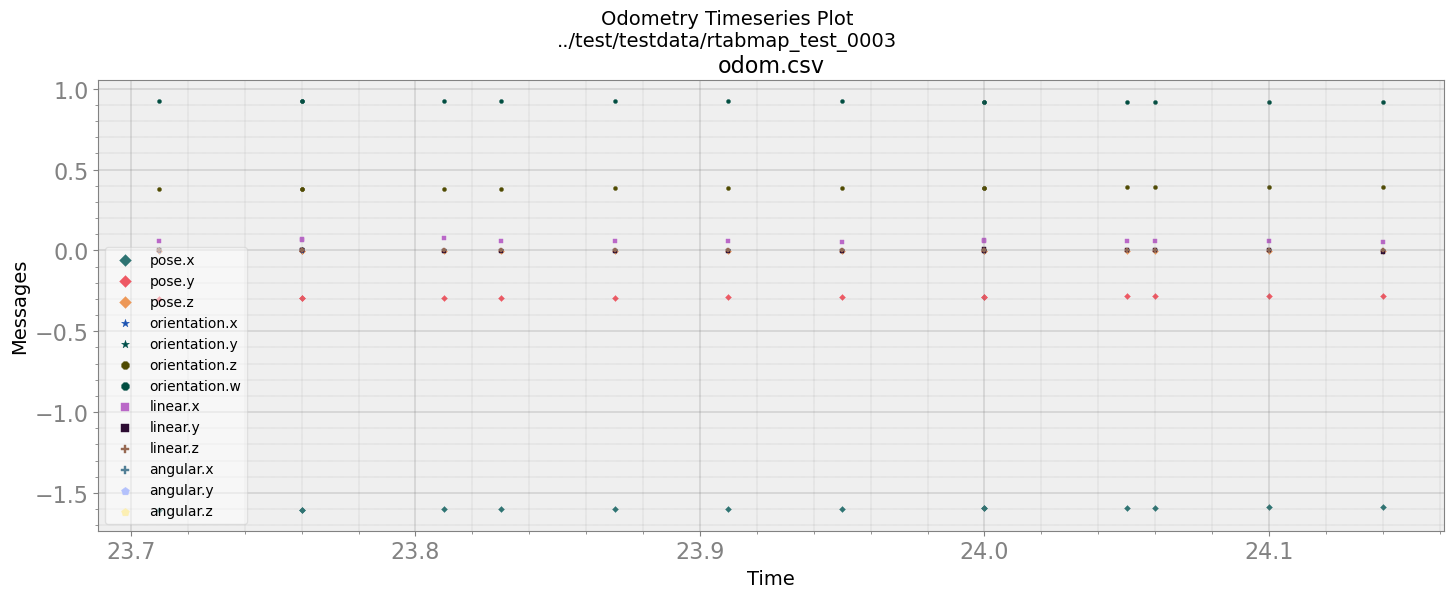

In [50]:
b.plot_odometry(save_fig = False)

In [38]:
msg_file = pd.read_csv(b.message_by_topic(topic='/mybot/laser/scan'))
msg_file

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,angle_min,angle_max,angle_increment,time_increment,scan_time,...,intensities_710,intensities_711,intensities_712,intensities_713,intensities_714,intensities_715,intensities_716,intensities_717,intensities_718,intensities_719
0,44.59,2402,44,550000000,hokuyo,-1.5708,1.5708,0.004369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44.59,2403,44,560000000,hokuyo,-1.5708,1.5708,0.004369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44.59,2404,44,560000000,hokuyo,-1.5708,1.5708,0.004369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44.63,2405,44,590000000,hokuyo,-1.5708,1.5708,0.004369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44.63,2406,44,610000000,hokuyo,-1.5708,1.5708,0.004369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,45.64,2504,45,630000000,hokuyo,-1.5708,1.5708,0.004369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,45.68,2505,45,630000000,hokuyo,-1.5708,1.5708,0.004369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,45.68,2506,45,660000000,hokuyo,-1.5708,1.5708,0.004369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,45.68,2507,45,660000000,hokuyo,-1.5708,1.5708,0.004369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
